# <font color=#9797c3>Analysis of the news in France

##### The data is from online magazine 'Le Monde' - one of the most popular publication in France

## <font color=#9797c3>The aim of the study:

###      news about the war in Ukraine in percentage compared to local news in different countries of the world

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

#### <font color=#9797c3>Step 1: create a dataframe by using pandas

In [36]:
df = pd.read_json('fr_news.json')
df

,title,date
0,"Meet Philip Anschutz, the very conservative bo...",2022-04-15
1,Twitter announces plan to defend itself from M...,2022-04-15
2,"In Palestine, the city of Jenin considers itse...",2022-04-15
3,"In El Salvador, crime gangs and the president ...",2022-04-15
4,"In Avignon, Le Pen encourages her supporters t...",2022-04-15
...,...,...
237,Davos Forum: 'The end of the month has overtak...,2023-01-16
238,Svetlana Tsikhanovskaya: 'Dissociating Belarus...,2023-01-16
239,Nepal mourns victims of deadliest plane crash ...,2023-01-16
240,"Australian Open: In Melbourne, Djokovic wants ...",2023-01-16


#### <font color=#9797c3>Step 2: keywords to scrap news

In [37]:
anchors = [
    "ukraine",
    "ukrainian",
    "russia",
    "russian",
    "dpr",
    "lpr",
    "putin",
    "zelensky",
    "kyiv",
    "bakhmut"
]

#### <font color=#9797c3>Step 3: check whether the word is in keywords

In [38]:
def check_string(string: str):
    for one_word in anchors:
        if one_word in string.lower():
            return True
    return False

ukraine_war_df = df[df['title'].apply(lambda x: check_string(x))]
ukraine_war_df.head()

,title,date
6,Chicago's Ukrainian Village finds new purpose ...,2022-04-15
8,"'Mom packed her bags, we said unbearable thing...",2022-04-15
10,Germany weighs risks of life without Russian g...,2022-04-15
22,'Marine Le Pen advocates diplomacy that confor...,2022-04-15
23,"Russia's damaged flagship Moskva sinks, hit by...",2022-04-15


#### <font color=#9797c3>Step 4: calculate the percentage of the news about war in Ukraine

##### The data is specific days during the war (ex. blackouts, liberation of Kherson)

In [51]:
ukraine_war_per_cent = []
dates = list(ukraine_war_df.date.unique())
for date in dates:

    one_month_df = df[df['date'] == date].shape[0]
    one_month_ukraine_df = ukraine_war_df[ukraine_war_df['date'] == date].shape[0]

    try:
        ukraine_war_per_cent.append(round(one_month_ukraine_df/one_month_df * 100, 2))
    except ZeroDivisionError:
        ukraine_war_per_cent.append(0.0)

string_dates = [np.datetime_as_string(date, unit='D') for date in dates]
string_dates


['2022-04-15',
 '2022-07-14',
 '2022-09-11',
 '2023-05-18',
 '2022-09-08',
 '2022-11-11',
 '2023-01-16']

#### <font color=#9797c3>Step 5: create the bar graph

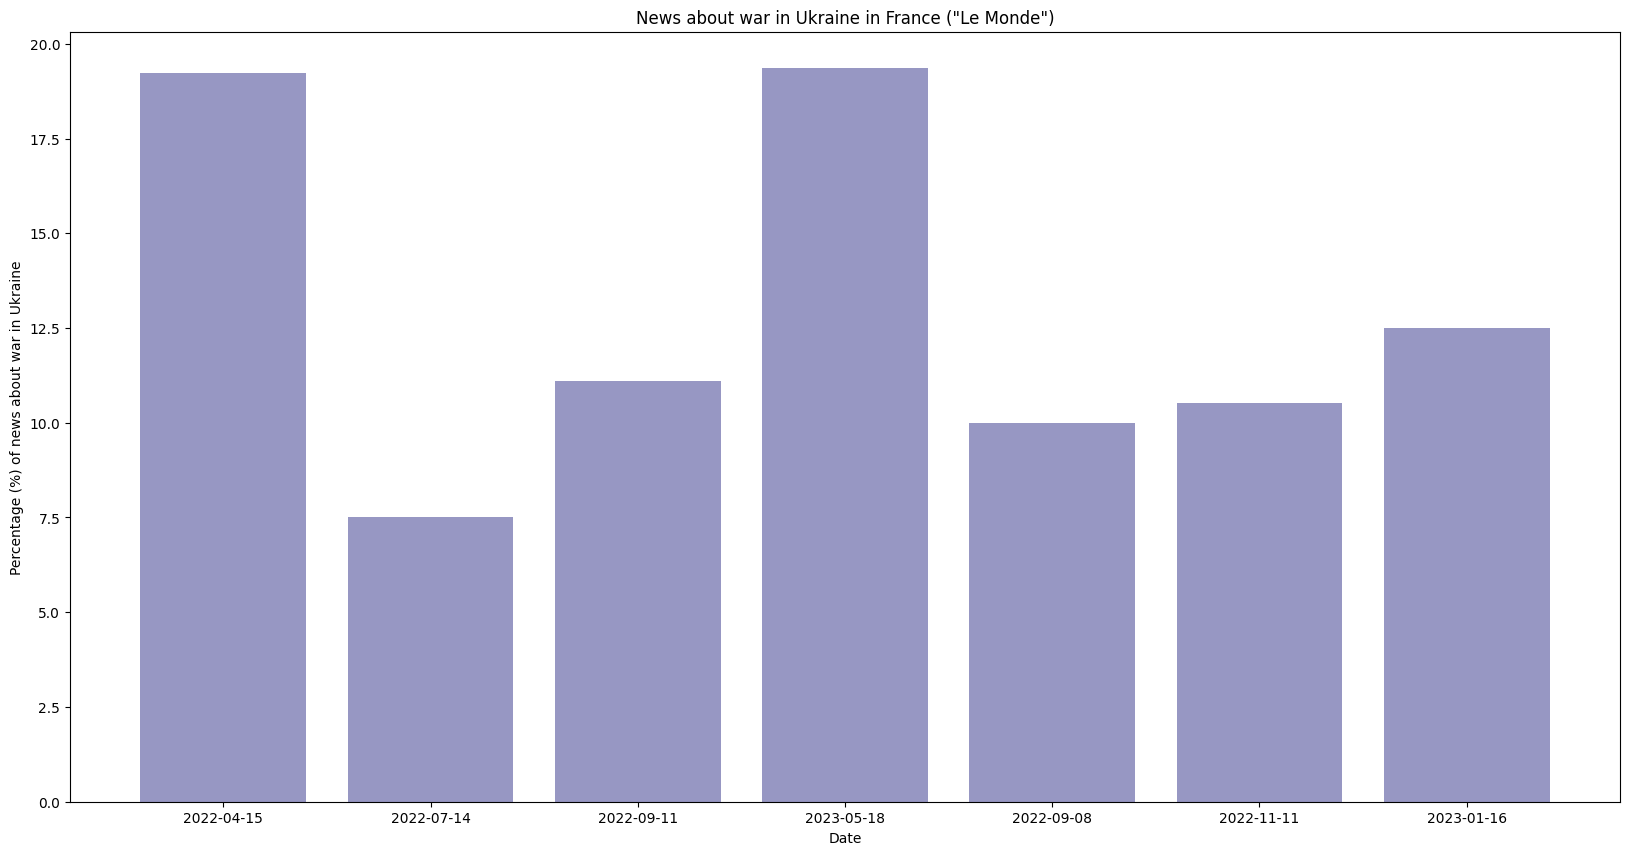

In [49]:
plt.figure(figsize=(20, 10))

plt.bar(string_dates, ukraine_war_per_cent, color = '#9797c3')

plt.xlabel('Specific dates during the war')
plt.ylabel('Percentage (%) of news about war in Ukraine')
plt.title('News about war in Ukraine in France ("Le Monde")')
plt.show()